# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set()

np.random.seed(42)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


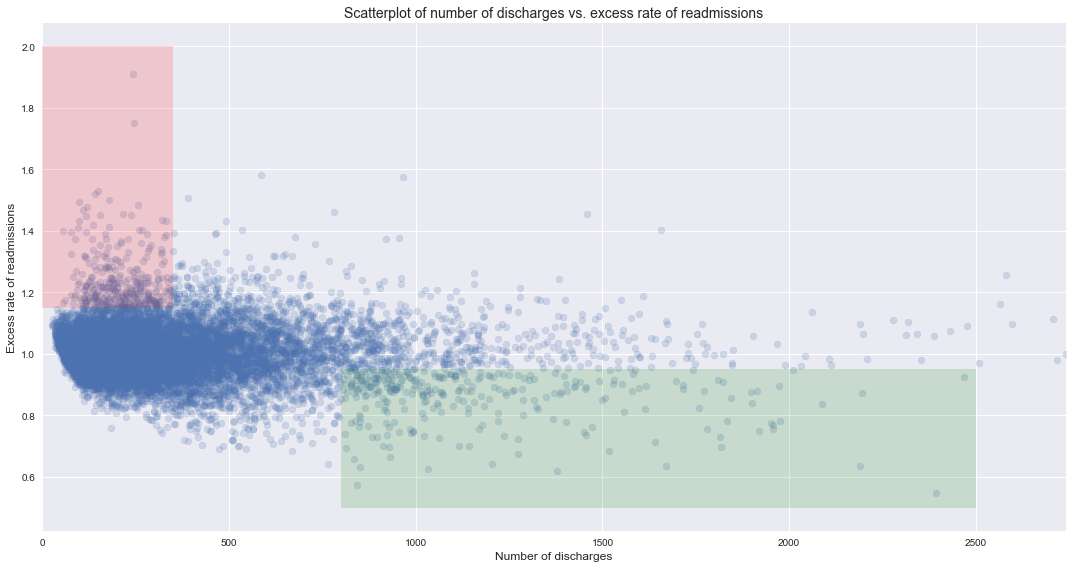

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x, y, alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
df = clean_hospital_read_df
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df.columns = ['discharges','rate']
df.reset_index(drop = True)
df.discharges = df.discharges.astype(int)
df.describe()

,discharges,rate
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


Text(0.5,1,'Linear Regression of Hospital Capacity (Number of Discharge) and Readmission Rates')

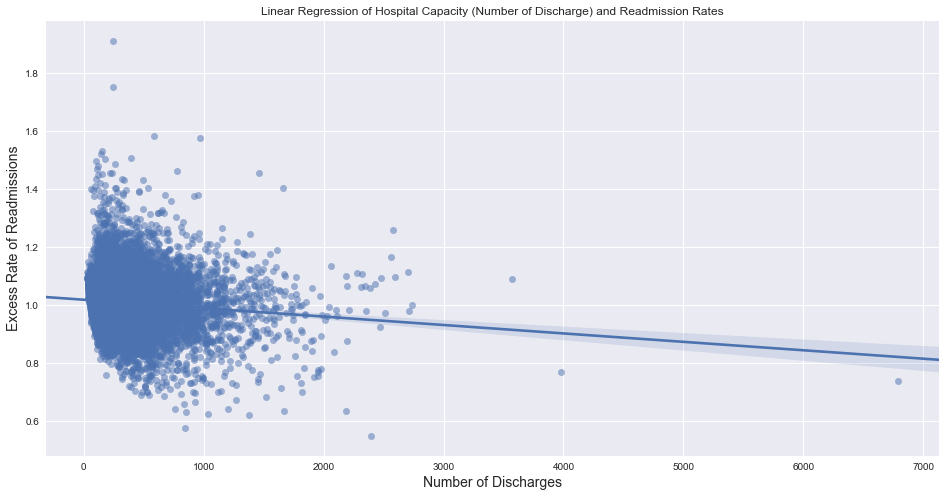

In [7]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.regplot(x = 'discharges', y = 'rate', data = df, scatter_kws={'alpha':0.5})
xlabel('Number of Discharges', fontsize = 14)
ylabel('Excess Rate of Readmissions', fontsize = 14)
ax.set_title('Linear Regression of Hospital Capacity (Number of Discharge) and Readmission Rates')

###### "Overall, rate of readmissions is trending down with increasing number of discharges"

#### Small Hospitals

    In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

In [9]:
sh = df[df.discharges < 100] # assign number of discharges < 100 to small hospitals : sh
sh.describe()

,discharges,rate
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


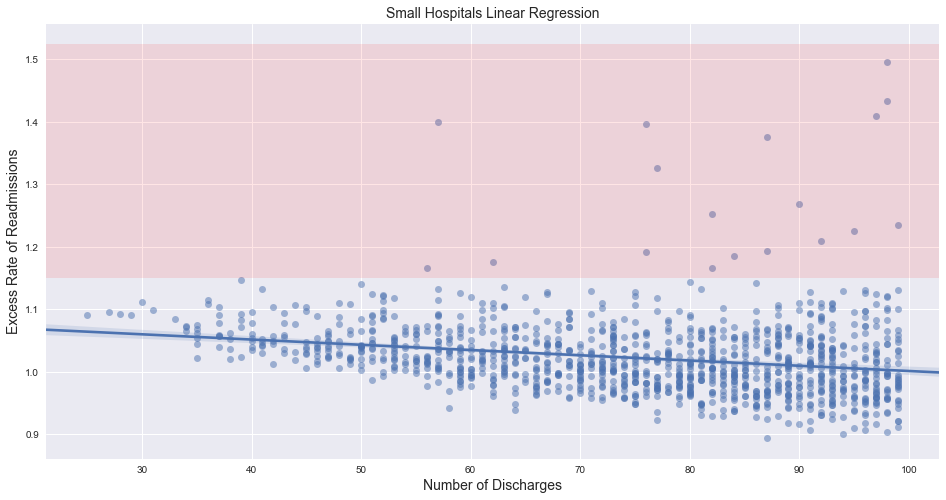

In [10]:
ax = sns.regplot(x = 'discharges', y = 'rate', data = sh, scatter_kws = {'alpha' : 0.5})
xlabel('Number of Discharges', fontsize = 14)
ylabel('Excess Rate of Readmissions', fontsize = 14)
title('Small Hospitals Linear Regression', fontsize = 14)
ax.fill_between([0,350], 1.15, 1.525, facecolor = 'red', alpha = .1, interpolate = True)
show()

In [11]:
r_sh, p_sh = stats.pearsonr(sh.discharges, sh.rate)
print('r (small hospitals): {:0.4}\np-value (small hospitals): {:0.4}'.format(r_sh, p_sh))

r (small hospitals): -0.2446
p-value (small hospitals): 1.196e-17


###### With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

#### Large Hospitals

    In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [12]:
lh = df[df.discharges > 1000] # assign where number of discharges > 1000 as Large hospitals : lh
lh.describe()

,discharges,rate
count,463.000000,463.000000
mean,1383.427646,0.978335
std,459.109724,0.120007
min,1002.000000,0.549500
25%,1107.000000,0.907900
50%,1242.000000,0.986400
75%,1512.000000,1.057100
max,6793.000000,1.454300


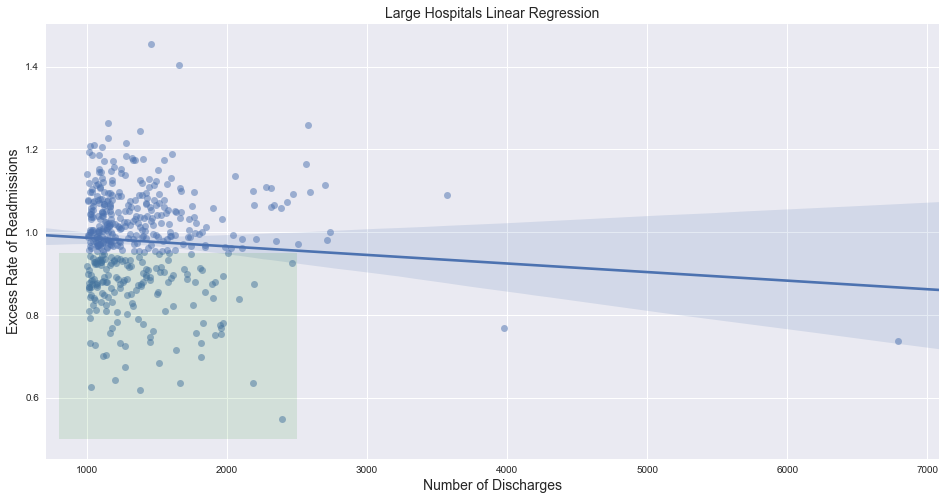

In [13]:
ax = sns.regplot(x = 'discharges', y = 'rate', data = lh, scatter_kws = {'alpha' : 0.5})
xlabel('Number of Discharges', fontsize = 14)
ylabel('Excess Rate of Readmissions', fontsize = 14)
title('Large Hospitals Linear Regression', fontsize = 14)
ax.fill_between([800,2500], .5, .95, facecolor = 'green', alpha = .1, interpolate = True)
show()

In [14]:
r_lh, p_lh = stats.pearsonr(lh.discharges, lh.rate)
print('r (large hospitals): {:0.4}\np-value (large hospitals): {:0.4}'.format(r_lh, p_lh))

r (large hospitals): -0.07928
p-value (large hospitals): 0.0884


###### With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

In [15]:
sh_mean = stats.trim_mean(sh.rate, 0.05)
lh_mean = stats.trim_mean(lh.rate, 0.05)
mean_diff = sh_mean - lh_mean
print(sh_mean, lh_mean, mean_diff)

1.019378598130841 0.9806880095923262 0.038690588538514814


In [16]:
n_data = sum((df.discharges < 100) | (df.discharges > 1000))/len(df)
print('Number of Data Points Used: {:0.4}%'.format(n_data*100))

Number of Data Points Used: 14.36%


### Do you agree with the above analysis and recommendations? Why or why not? ###

Overall, I agree with the initial observations and statistics which appear to be consistent with the data. Whether or not there is a significant correlation between hospital capacity (number of discharges) and readmission rates, however, is questionable although there does indeed appear to marginally downward trend. This correlation is tested in the forthcoming analysis. The speculation that smaller hospitals/facilities may lack in resources thereby leading to readmissions is unfounded. 

The regulatory policy recommendations cannot be readily justified from the provided analysis. The report shares statistics for small and large hospitals/facilities, described by number of discharges (< 100) and (> 1000), respectively. Their first recommendation, however, expands the small hospitals/facilities to include those with (< 300) without further explanation. Their latter recommendation of consolidation for higher capacity and number of discharges does not seem realistic due to the complications involved (i.e. healthcare access, finances, location, etc.).  

### Provide support for your arguments and your own recommendations with a statistically sound analysis: ###


</p> **Null Hypothesis**: No correlation exists between number of discharges and hospital readmission rate.   </p>

</p>$$H_o: r = 0$$</p>

</p> **Alternate Hypothesis**: There is a correlation between number of discharges and hospital readmission rate.   </p>

</p>$$H_a: r \neq 0$$</p>

For this analysis, the significance level (**$\alpha$**) is **0.01**. 


###### significance test

The significance test for Pearson r is given by:
$$t = r\sqrt{\frac{n-2}{1-r^2}}$$

In [17]:
r_obs, p_obs = stats.pearsonr(df.discharges, df.rate)
n = len(df.discharges)
t_score = r_obs * np.sqrt(n - 2)/np.sqrt(1 - r_obs**2)
print('r observed: {:0.4}\nt-score: {:0.4}\np-value: {:0.4}'.format(r_obs, t_score, p_obs))

r observed: -0.0974
t-score: -10.49
p-value: 1.223e-25


Our computed p-value (1.22e-25) under the frequentist test is far less than the designated significance level of 0.01, therefore we reject the null hypothesis that there is no correlation between number of discharges and hospital readmission rate. There exists a small negative correlation (Pearson r = -0.0974) between the two variables. 

We test the alternate hypothesis by doing a permutation test in which we permute the number of discharges values but leave the excess rates of readmission fixed to generate a new set of data. This efficiently simulates the significance test and is exact because it uses all data and eliminates any correlation because paired values will be shuffled.

In [18]:
r_null = 0
size = 10000
perm_reps = np.empty(size) # initialize permutation replicates

for i in range(size):
    discharges_permuted = np.random.permutation(df.discharges)
    perm_reps[i] = pearson_r(discharges_permuted, df.rate) # compute pearson correlation

p_rep = np.sum(perm_reps >= r_null) / len(perm_reps)
r_rep = np.mean(perm_reps)

print('replicate r: {:0.4}\nreplicate p-value: {}'.format(r_rep, p_rep))

replicate r: -8.711e-07
replicate p-value: 0.5008


The statistical evidence supports the claim that there is correlation between hospital/facility capacity (i.e. number of discharges) and excess readmission rates. Although the correlation coefficient is small, it stands the test of being statistically significant as proven by both frequentist and bootstrap approach. This correlation indicates a relationship, however, does not imply that expanding in capacity will decrease readmission rates. With regard to the client, I would advise refrain from acting on the report's recommendations without further analyses and understanding of underlying factors which might influence this trend.  

#### Data Visualization ####

Although the scatter plot above shows the data for which the report summarizes, it would be helpful to view the distribution of data as well as the linear regression and correlation coefficient mentioned.  

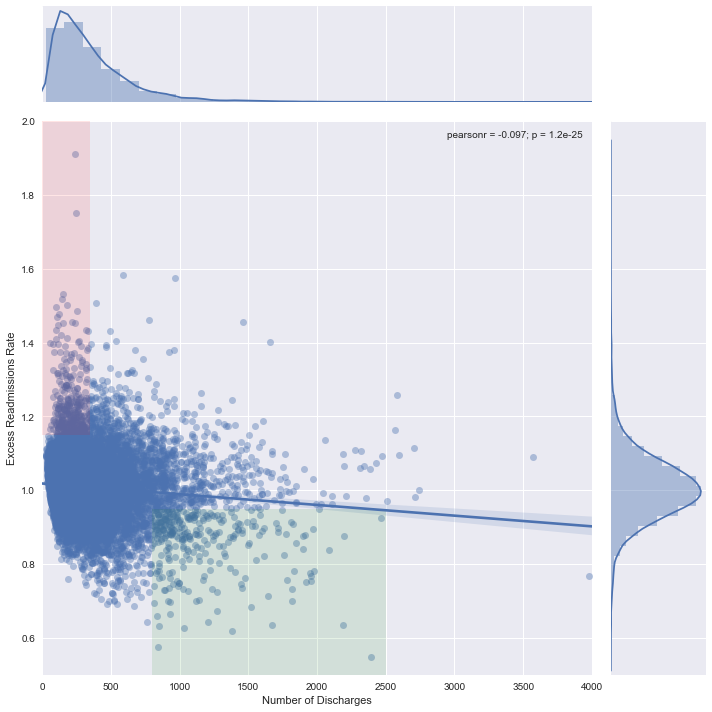

In [19]:
ax = sns.jointplot(df.discharges, df.rate, xlim = (0, 4000), ylim = (0.5, 2), kind = "reg", size = 10, scatter_kws = {'alpha' : 0.4})
xlabel('Number of Discharges')
ylabel('Excess Readmissions Rate')
fill_between([0,350], 1.15, 2, facecolor = 'red', alpha = .1, interpolate = True)
fill_between([800,2500], .5, .95, facecolor = 'green', alpha = .1, interpolate = True)
show()